# Q1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Lab5.1.csv")

X = df['mother'].values
Y = df['daughter'].values

In [3]:
a = 0.001
epoch = 4
b0 = 0
b1 = 0
m = len(X)
error = []

for ep in range(epoch):
    for i in range(m):
        xi = X[i]
        yi = Y[i]
        y_pred = b0 + b1*xi
        
        e = y_pred - yi
        error.append(e)
        
        b0 = b0 - a*e
        b1 = b1 - a*e*xi

    
mse = np.mean(np.square(error))
rmse = np.sqrt(mse) 
print(f'MSE = {mse}')
print(f'RMSE = {rmse}')
print(f'b0: {b0},b1: {b1}')

NameError: name 'X' is not defined

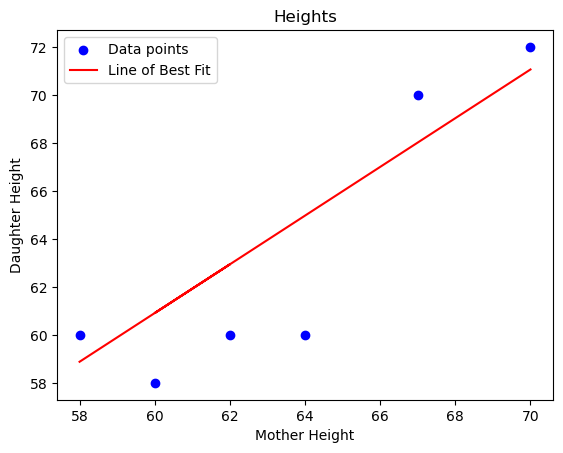

In [4]:
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, b0 + b1 * X, color='red', label='Line of Best Fit')
plt.xlabel('Mother Height')
plt.ylabel('Daughter Height')
plt.title('Heights')
plt.legend()
plt.show()

In [5]:
new = 63
pred = b0 + b1 * new
print(f'Prediction {new}: {pred}')

Prediction 63: 63.956400249074235


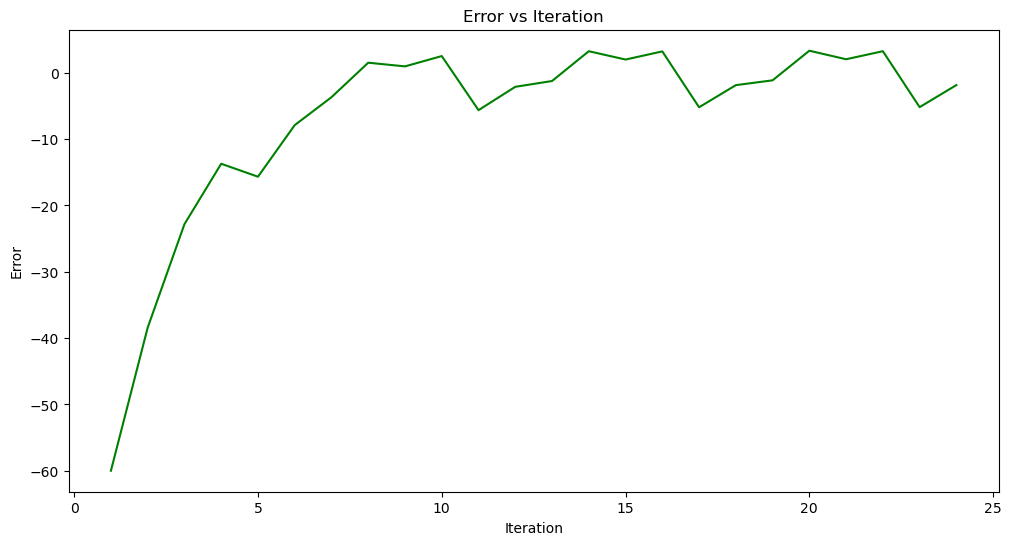

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(error) + 1), error, color='green')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error vs Iteration')
plt.show()

# Q2

In [7]:
data=pd.read_csv('Lab5.2.csv')

X=data['hours'].values
Y=data['pass'].values

In [8]:
def loss(y_pred,y):
    return -(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))

In [9]:
def grad(X,Y,epochs,a,w,b):
    for _ in range(epochs):
        for x,y in zip(X,Y):
            z=w*x + b
            y_pred=1/(1+np.exp(-z))
            e=y_pred-y
            w=w-(a*e*x)
            b=b-(a*e)
        errors.append(loss(y_pred,y))
    
    return w,b

In [2]:
epochs=500
a=0.001
w,b=0,0
errors=[]
w,b=grad(X,Y,epochs,a,w,b)

y_probs=[1/(1+np.exp(-(w*x+b))) for x in X]

y_binary = [1 if prob > 0.5 else 0 for prob in y_probs]

NameError: name 'grad' is not defined

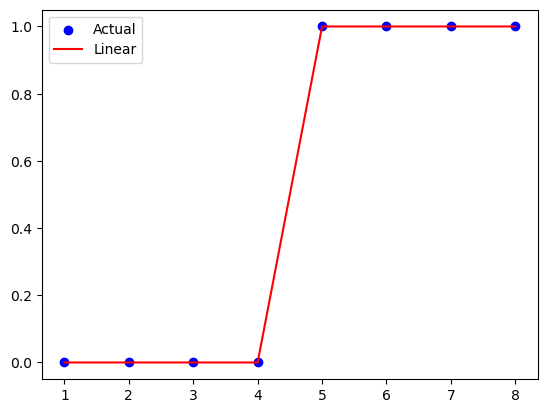

In [11]:
plt.scatter(X,Y,color='blue',label='Actual')
plt.plot(X,y_binary,color='red',label='Linear')
plt.legend()
plt.show()

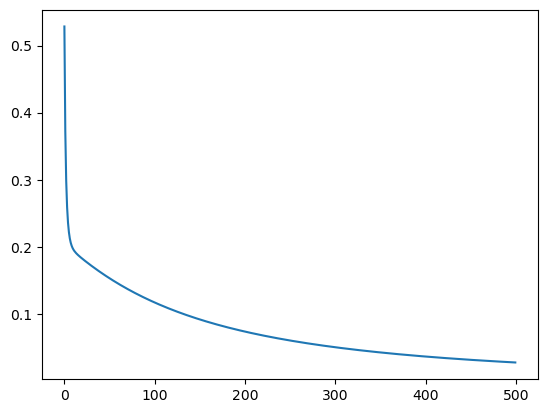

In [12]:
plt.plot(list(range(len(errors))),errors)

In [13]:
print(f"3.5hrs : {1/(1+np.exp(-(w*3.5 +b)))}")

print(f"7.5hrs : {1/(1+np.exp(-(w*7.5 +b)))}")


3.5hrs : 0.3895795881477794
7.5hrs : 0.9585457239660987


# Q3

In [14]:
data = pd.read_csv('Lab5.3.csv')
X1 = data['x1'].values
X2 = data['x2'].values
Y = data['y'].values

In [15]:
w1, w2, b = 0, 0, 0  
a = 0.01 
epochs = 1000  

In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [17]:
def loss(y_pred, y):
    return -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [18]:
def grad(X1, X2, Y, epochs, a, w1, w2, b):
    errors = []
    for _ in range(epochs):
        for x1, x2, y in zip(X1, X2, Y):
            z = w1 * x1 + w2 * x2 + b
            y_pred = sigmoid(z)
            
            e = y_pred - y
            
            w1 -= a * e * x1
            w2 -= a * e * x2
            b -= a * e
            
        errors.append(loss(y_pred, y))
    return w1, w2, b, errors

w1, w2, b, errors = grad(X1, X2, Y, epochs, a, w1, w2, b)
w1, w2, b

(1.2583970172688976, -3.5152667466687326, 1.095068197708901)

In [19]:
y_probs = sigmoid(w1 * X1 + w2 * X2 + b)
y_binary = [1 if prob > 0.5 else 0 for prob in y_probs]

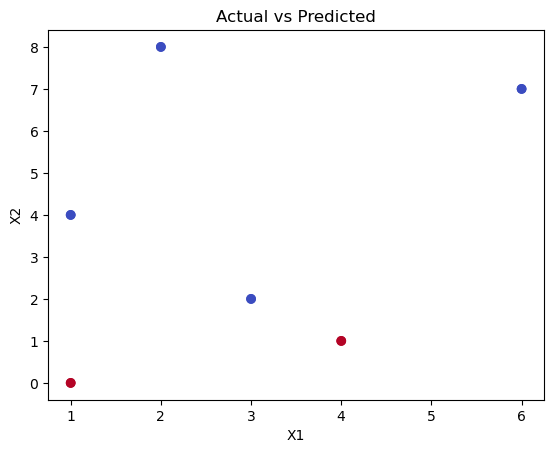

In [20]:
plt.scatter(X1, X2, c=Y, cmap='coolwarm', marker='o')
plt.scatter(X1, X2, c=y_binary, cmap='coolwarm', marker='o')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Actual vs Predicted')
plt.show()

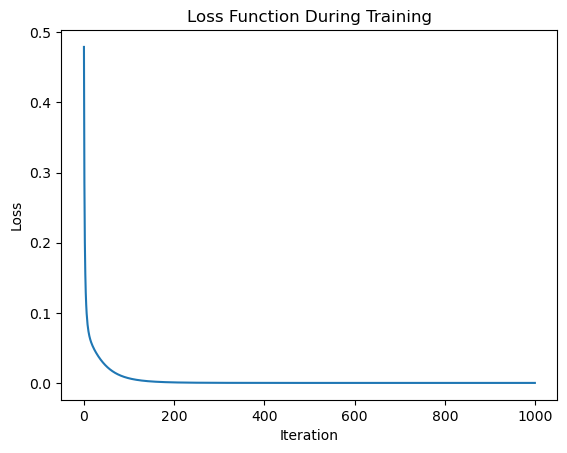

In [21]:
plt.plot(errors)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function During Training')
plt.show()